In [1]:
import os
import re
import pandas as pd
import nilearn as nl
import numpy as np
import seaborn as sns
from nilearn.input_data import NiftiMasker
from nilearn.image.image import mean_img
from nilearn import plotting, image
from nilearn.plotting import view_img
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from nilearn.image import math_img
import time
import multiprocessing






/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


ImportError: cannot import name 'get_renderer' from 'matplotlib.tight_layout' (/opt/anaconda3/lib/python3.8/site-packages/matplotlib/tight_layout.py)

In [ ]:
#f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
#    '../derivatives/') for f in files if 
#          (('me1' in f) & (f.endswith('desc-preproc_bold.nii.gz')))|
#         (('me4' in f ) & (f.endswith('desc-optcom-dewarped_bold.nii.gz')))]

f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
   '../derivatives/fmriprep') for f in files if f.endswith('space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')]
sub_list=["sub-10017","sub-10024",'sub-10035','sub-10043','sub-10054','sub-10059','sub-10074','sub-10078','sub-10080',
          'sub-10108','sub-10125','sub-10136','sub-10137','sub-10142','sub-10150','sub-10154','sub-10186',
         'sub-10188','sub-10221']
f_list=[f for f in f_list if any(substring in f for substring in sub_list)]
f_list= [f for f in f_list if "retest" not in f]
display(f_list)

# Making anatomical Masks and getting files

In [2]:
from nilearn import image,datasets,masking,plotting,input_data
#Striatum Mask
if 1==0:


    HO_sub=datasets.fetch_atlas_harvard_oxford(atlas_name='sub-maxprob-thr25-2mm')

    keep = [idx for idx, s in enumerate(HO_sub.labels) if
            'Accumbens' in s]

    keepimg_list=[image.math_img("img==%s"%(idx),img=HO_sub.maps) for idx in keep]   

    str_regions=image.concat_imgs(np.array(keepimg_list))
    str_mask=masking.compute_background_mask(str_regions)
    str_mask=NiftiMasker(mask_img=str_mask)

    #MPFC mask
    HO_cort=datasets.fetch_atlas_harvard_oxford(atlas_name='cort-maxprob-thr50-2mm')
    keep = [idx for idx, s in enumerate(HO_cort.labels) if
            'Frontal Medial Cortex'==s or
            'Frontal Pole'==s or
            'Frontal Orbital Cortex'==s or
            'Cingulate Gyrus, anterior division'==s or
            'Paracingulate Gyrus'==s]

    keepimg_list=[image.math_img("img==%s"%(idx),img=HO_cort.maps) for idx in keep]                               

    cort_regions=image.concat_imgs(np.array(keepimg_list))
    cort_mask=masking.compute_background_mask(cort_regions)
    cort_mask=NiftiMasker(mask_img=cort_mask)

    #SMA mask
    HO_cort=datasets.fetch_atlas_harvard_oxford(atlas_name='cort-maxprob-thr50-2mm')
    keep = [idx for idx, s in enumerate(HO_cort.labels) if
            'Juxtapositional Lobule Cortex' in s or
            'Precentral Gyrus'==s or
            'Postcentral Gyrus'==s]

    keepimg_list=[image.math_img("img==%s"%(idx),img=HO_cort.maps) for idx in keep]                               

    SMA_regions=image.concat_imgs(np.array(keepimg_list))
    SMA_mask=masking.compute_background_mask(SMA_regions)
    SMA_mask=NiftiMasker(mask_img=SMA_mask)

    plotting.plot_roi(cort_mask.mask_img,title="PFC Mask", draw_cross=False)
    plt.show()
    plotting.plot_roi(str_mask.mask_img,title='Striatum Mask',draw_cross=False)
    plt.show()
    plotting.plot_roi(SMA_mask.mask_img,title='SMA Mask',draw_cross=False)
    plt.show()

ImportError: cannot import name 'get_renderer' from 'matplotlib.tight_layout' (/opt/anaconda3/lib/python3.8/site-packages/matplotlib/tight_layout.py)

# Getting Functional Masks and getting files

In [3]:
import os
os.listdir('../masks/')

['rVS-Imanova_2mm_removeNANs_thr.nii.gz',
 'rVS-Imanova_2mm_removeNANs_thr_bin.nii.gz',
 'bg_image.nii',
 'ROI-VS_cname-prereg.nii.gz',
 'fROI-FFA_cname-StrVsComp_zstat-1.nii.gz',
 'fROI-vmPFC_cname-RewVsPun_zstat-1.nii.gz',
 'VS-Imanova_2mm.nii',
 'fROI-putamen_cname-RewVsPun_zstat-1.nii.gz',
 'fROI-sCerb_cname-LeftVsRight_zstat-1.nii.gz',
 'fROI-RVS_cname-RewVsPun_zstat-1.nii.gz',
 'fROI-Motor_cname-LeftVsRight_zstat-1.nii.gz',
 'rVS-Imanova_2mm_removeNANs.nii.gz',
 'fROI-iCerb_cname-LeftVsRight_zstat-1.nii.gz',
 'fROI-LVS_cname-RewVsPun_zstat-1.nii.gz',
 'rVS-Imanova_2mm.nii',
 'seed-VS.nii.gz']

In [18]:
from nilearn import  image
#Striatum Mask
if 1==1:
    VS_mask='../masks/ROI-VS_cname-prereg.nii.gz'
    rstr_mask='../masks/fROI-RVS_cname-RewVsPun_zstat-1.nii.gz'
    lstr_mask='../masks/fROI-LVS_cname-RewVsPun_zstat-1.nii.gz'
    pfc_mask='../masks/fROI-vmPFC_cname-RewVsPun_zstat-1.nii.gz'
    FFA_mask='../masks/fROI-FFA_cname-StrVsComp_zstat-1.nii.gz'
    sCerb_mask='../masks/fROI-sCerb_cname-LeftVsRight_zstat-1.nii.gz'
    iCerb_mask='../masks/fROI-iCerb_cname-LeftVsRight_zstat-1.nii.gz'
    motor_mask='../masks/fROI-Motor_cname-LeftVsRight_zstat-1.nii.gz'
    mask_list=[VS_mask,rstr_mask,lstr_mask,pfc_mask,FFA_mask,sCerb_mask,iCerb_mask,motor_mask]
    
    for mask in mask_list:
        str_mask=NiftiMasker(mask_img=mask)
        plotting.plot_roi(mask,draw_cross=False)
        plt.show()

NameError: name 'plotting' is not defined

In [9]:
re.search('fROI-(.*)_cname',mask_list[0]).group(1)

'RVS'

# Tsnr for funtional masks

In [25]:
flist=['../derivatives/tsnr/'+img for img in os.listdir(
    '../derivatives/tsnr/') if ('_tsnr' in img) &('mb' in img)]
display(flist)

['../derivatives/tsnr/sub-10054_acq-mb1me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10136_acq-mb1me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10059_acq-mb1me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10203_acq-mb1me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10043_acq-mb3me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10074_acq-mb3me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10074_acq-mb6me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10017_acq-mb1me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10186_acq-mb6me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10017_acq-mb6me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10136_acq-mb3me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10108_acq-mb6me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10198_acq-mb1me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10186_acq-mb1me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10043_acq-mb3me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10137_acq-mb3me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10059_acq-mb1me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10035

In [26]:
data=[]
img_list=[]
for img in flist:
    start = time.time()
    tsnr_img=img
    print(img)
    sub=re.search('tsnr/sub-(.*?)_acq',img).group(1)
    me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
    mb=int(re.search('_acq-mb(.*?)me',img).group(1))
    #sub=re.search('func/sub-(.*?)_task',img).group(1)
    print('sub: %s Multiband: %s Multiecho: %s'%(sub,mb,me))
    #tsnr_img = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=img)
    
    for mask in mask_list:
        nifti_masker = NiftiMasker(mask_img=mask)
        mask_name=re.search('ROI-(.*)_cname',mask).group(1)
        x=nifti_masker.fit_transform(tsnr_img)
        img=nifti_masker.inverse_transform(x)
        data.append([sub,mb,me,mask_name,np.mean(x.flatten())])

../derivatives/tsnr/sub-10054_acq-mb1me4_tsnr.nii.gz
sub: 10054 Multiband: 1 Multiecho: 4
../derivatives/tsnr/sub-10136_acq-mb1me1_tsnr.nii.gz
sub: 10136 Multiband: 1 Multiecho: 1
../derivatives/tsnr/sub-10059_acq-mb1me4_tsnr.nii.gz
sub: 10059 Multiband: 1 Multiecho: 4
../derivatives/tsnr/sub-10203_acq-mb1me1_tsnr.nii.gz
sub: 10203 Multiband: 1 Multiecho: 1
../derivatives/tsnr/sub-10043_acq-mb3me4_tsnr.nii.gz
sub: 10043 Multiband: 3 Multiecho: 4
../derivatives/tsnr/sub-10074_acq-mb3me1_tsnr.nii.gz
sub: 10074 Multiband: 3 Multiecho: 1
../derivatives/tsnr/sub-10074_acq-mb6me1_tsnr.nii.gz
sub: 10074 Multiband: 6 Multiecho: 1
../derivatives/tsnr/sub-10017_acq-mb1me1_tsnr.nii.gz
sub: 10017 Multiband: 1 Multiecho: 1
../derivatives/tsnr/sub-10186_acq-mb6me1_tsnr.nii.gz
sub: 10186 Multiband: 6 Multiecho: 1
../derivatives/tsnr/sub-10017_acq-mb6me1_tsnr.nii.gz
sub: 10017 Multiband: 6 Multiecho: 1
../derivatives/tsnr/sub-10136_acq-mb3me1_tsnr.nii.gz
sub: 10136 Multiband: 3 Multiecho: 1
../derivat

../derivatives/tsnr/sub-%s_acq-mb%sme%s_tsnr.nii.gz


AttributeError: 'NoneType' object has no attribute 'group'

In [6]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','Region','TSNR'])
df.to_csv("TSNRinfo.tsv",sep="\t",index=False)


NameError: name 'data' is not defined

,sub,MB,ME,Region,TSNR
0,10054,1,4,RVS,45.064114
1,10054,1,4,LVS,39.894398
2,10054,1,4,vmPFC,56.778843
3,10054,1,4,FFA,48.943893
4,10054,1,4,sCerb,50.684155
...,...,...,...,...,...
639,10054,6,4,vmPFC,45.089394
640,10054,6,4,FFA,47.255760
641,10054,6,4,sCerb,47.175060
642,10054,6,4,iCerb,44.201252


RVS


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 92      Method:             REML     
No. Groups:       26      Scale:              7.1980   
Min. group size:  2       Log-Likelihood:     -252.6107
Max. group size:  6       Converged:          Yes      
Mean group size:  3.5                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    28.694    1.449 19.808 0.000 25.855 31.534
MB           -0.135    0.286 -0.471 0.638 -0.695  0.426
ME            5.055    0.378 13.371 0.000  4.314  5.796
MB:ME        -0.932    0.095 -9.812 0.000 -1.118 -0.746
Group Var    21.166    2.889                           
=======================================================

"""

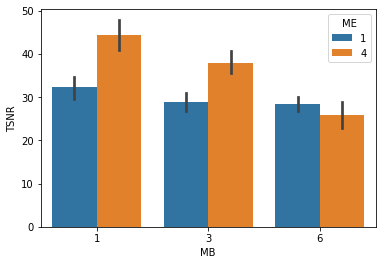

LVS


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 92      Method:             REML     
No. Groups:       26      Scale:              11.5113  
Min. group size:  2       Log-Likelihood:     -265.7095
Max. group size:  6       Converged:          Yes      
Mean group size:  3.5                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    23.457    1.636 14.339 0.000 20.251 26.663
MB            0.143    0.360  0.398 0.691 -0.562  0.848
ME            5.977    0.476 12.561 0.000  5.044  6.910
MB:ME        -0.999    0.120 -8.350 0.000 -1.233 -0.764
Group Var    16.814    1.947                           
=======================================================

"""

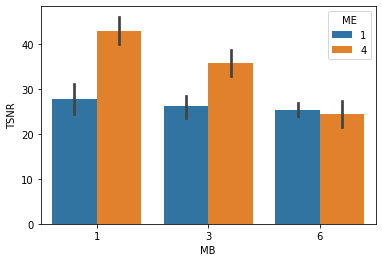

vmPFC


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 92      Method:             REML     
No. Groups:       26      Scale:              40.1055  
Min. group size:  2       Log-Likelihood:     -320.5598
Max. group size:  6       Converged:          Yes      
Mean group size:  3.5                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    33.130    3.066 10.807 0.000 27.122 39.139
MB            0.310    0.674  0.460 0.645 -1.011  1.631
ME            5.027    0.894  5.623 0.000  3.274  6.779
MB:ME        -0.648    0.224 -2.893 0.004 -1.088 -0.209
Group Var    58.184    3.824                           
=======================================================

"""

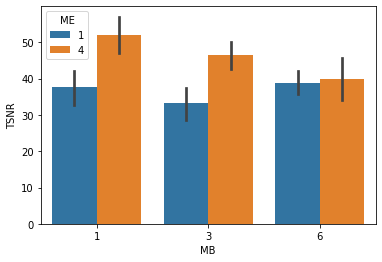

FFA


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 92      Method:             REML     
No. Groups:       26      Scale:              37.1499  
Min. group size:  2       Log-Likelihood:     -317.6017
Max. group size:  6       Converged:          Yes      
Mean group size:  3.5                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    34.804    2.941 11.836 0.000 29.041 40.567
MB            0.136    0.643  0.211 0.833 -1.124  1.396
ME            5.596    0.854  6.553 0.000  3.922  7.269
MB:ME        -0.749    0.215 -3.488 0.000 -1.169 -0.328
Group Var    56.089    3.630                           
=======================================================

"""

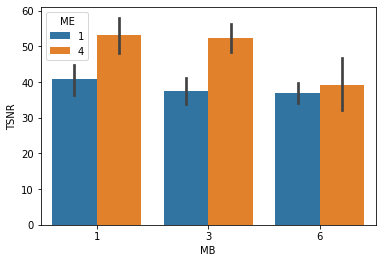

sCerb


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 92      Method:             REML     
No. Groups:       26      Scale:              16.5748  
Min. group size:  2       Log-Likelihood:     -277.4379
Max. group size:  6       Converged:          Yes      
Mean group size:  3.5                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    39.397    1.859 21.194 0.000 35.754 43.041
MB           -0.060    0.426 -0.140 0.889 -0.895  0.775
ME            5.533    0.568  9.742 0.000  4.420  6.646
MB:ME        -0.945    0.143 -6.621 0.000 -1.224 -0.665
Group Var    15.614    1.665                           
=======================================================

"""

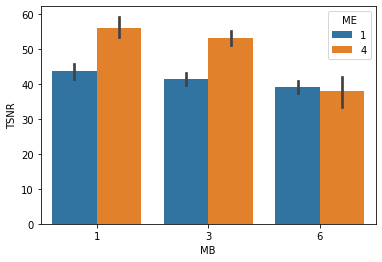

iCerb


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 92      Method:             REML     
No. Groups:       26      Scale:              16.7817  
Min. group size:  2       Log-Likelihood:     -284.7006
Max. group size:  6       Converged:          Yes      
Mean group size:  3.5                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    37.339    2.035 18.346 0.000 33.350 41.328
MB            0.054    0.434  0.126 0.900 -0.796  0.905
ME            5.420    0.575  9.419 0.000  4.292  6.547
MB:ME        -0.900    0.145 -6.228 0.000 -1.183 -0.617
Group Var    30.850    2.897                           
=======================================================

"""

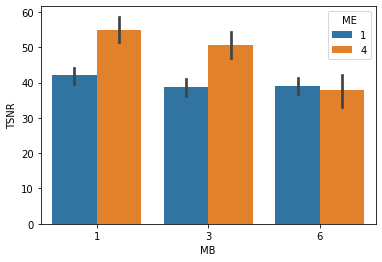

Motor


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 92      Method:             REML     
No. Groups:       26      Scale:              35.0372  
Min. group size:  2       Log-Likelihood:     -310.5325
Max. group size:  6       Converged:          Yes      
Mean group size:  3.5                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    45.135    2.706 16.679 0.000 39.831 50.439
MB            0.115    0.619  0.186 0.853 -1.099  1.329
ME            3.570    0.825  4.325 0.000  1.952  5.188
MB:ME        -0.680    0.208 -3.276 0.001 -1.087 -0.273
Group Var    33.571    2.482                           
=======================================================

"""

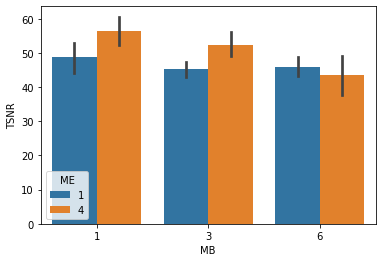

In [12]:
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as smf

df=pd.read_csv("TSNRinfo.tsv",sep='\t')
display(df)
for region in df['Region'].unique():
    print(region)
    plt_df=df[df['Region']==region]
    res=smf.mixedlm('TSNR ~ MB * ME',data=plt_df,groups=plt_df['sub']).fit()
    display(res.summary())
    sns.barplot(x='MB',y='TSNR',hue='ME',data=plt_df)
    plt.show()

In [13]:
f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
    '../derivatives/fsl/') for f in files if any(
    substring in f for substring in ['zstat','cope']) & f.endswith('.nii.gz') ]#  ('stats' in root) &if ('/stats/zstat' in f) & (f.endswith('nii.gz'))]
f_list=[f for f in f_list if ('stats/' in f) & ('L1_task' in f) &('denoise-' in f)&('type-act' in f)]
display(f_list)

['../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me4_sm-4_denoise-tedana.feat/stats/varcope10.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me4_sm-4_denoise-tedana.feat/stats/varcope15.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me4_sm-4_denoise-tedana.feat/stats/zstat2.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me4_sm-4_denoise-tedana.feat/stats/cope4.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me4_sm-4_denoise-tedana.feat/stats/zstat14.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me4_sm-4_denoise-tedana.feat/stats/varcope13.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me4_sm-4_denoise-tedana.feat/stats/cope9.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me4_sm-4_denoise-tedana.fea

# Reward:

In [14]:
contrasts=[5,6,8,10]

In [19]:
data=[]
img_list=[]
from tqdm import tqdm

                                        
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
for img in tqdm(f_list):
    me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
    mb=int(re.search('_acq-mb(.*?)me',img).group(1))
    sub=re.search('fsl/sub-(.*?)/L1',img).group(1)
    if sub in good_subs:
        
        if 'zstat' in img:
            stat='zstat'
            contrast=int(re.search('zstat(.*).nii.gz',img).group(1))
            
        if 'cope' in img:
            stat='cope'
            if 'varcope' in img:
                stat='varcope'
            contrast=int(re.search('cope(.*).nii.gz',img).group(1))
            
        if contrast in[11,12,13]:


            if me>1:
                if '_denoise-' in img:
                    denoise=re.search('_denoise-(.*).feat',img).group(1)
                else:
                    continue
            else:
                denoise='none'
            if sub in good_subs:
                for mask in mask_list:
                    masker= NiftiMasker(mask_img=mask)
                    mask_name=re.search('ROI-(.*)_cname',mask).group(1)
                    x=masker.fit_transform(img)
                    data.append([sub,mb,me,stat,contrast,denoise,mask_name,np.mean(x.flatten()),np.median(x.flatten())])

  0%|          | 42/10176 [00:15<1:03:32,  2.66it/s]


KeyboardInterrupt: 

In [ ]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','stat','contrast','denoise','mask_name','mean_act','median_act'])
df.to_csv("activation.tsv",sep="\t",index=False)
display(df.head())


,sub,MB,ME,stat,contrast,denoise,mask_name,mean_act,median_act
0,10154,6,4,varcope,13,tedana,VS,65879.882812,64771.292969
1,10154,6,4,varcope,13,tedana,RVS,79403.578125,58071.335938
2,10154,6,4,varcope,13,tedana,LVS,81971.859375,76431.484375
3,10154,6,4,varcope,13,tedana,vmPFC,30886.642578,32132.732422
4,10154,6,4,varcope,13,tedana,FFA,39737.035156,25795.398438


sub values are:  [10154 10142 10137 10108 10188 10186 10035 10150 10074 10043 10059 10078
 10136 10017 10080 10221 10054 10125 10024]
MB values are:  [6 3 1]
ME values are:  [4 1]
stat values are:  ['varcope' 'cope' 'zstat']
contrast values are:  [13 12 11]
denoise values are:  ['tedana' 'none']
mask_name values are:  ['VS' 'RVS' 'LVS' 'vmPFC' 'FFA' 'sCerb' 'iCerb' 'Motor']
mean_act values are:  [6.58798828e+04 7.94035781e+04 8.19718594e+04 ... 1.21934601e+02
 8.15653915e+01 9.87884064e+01]
median_act values are:  [64771.29296875 58071.3359375  76431.484375   ...   115.10939789
    92.80011749    90.6052475 ]
acq values are:  ['64' '34' '14' '61' '11' '31']
ME+denoise values are:  ['4_tedana' '4_none' '1_none']
condition values are:  ['Rew>Pun' 'Left>Right' 'STR>Comp']
Motor varcope


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM   Dependent Variable:   mean_act       
No. Observations:     171       Method:               REML           
No. Groups:           19        Scale:                6638587504.2235
Min. group size:      9         Log-Likelihood:       -2152.8563     
Max. group size:      9         Converged:            Yes            
Mean group size:      9.0                                            
---------------------------------------------------------------------
              Coef.       Std.Err.   z    P>|z|   [0.025     0.975]  
---------------------------------------------------------------------
Intercept     100652.565 30704.394  3.278 0.001  40473.059 160832.072
MB            -13893.655  7111.326 -1.954 0.051 -27831.598     44.288
ME             24945.272  8396.002  2.971 0.003   8489.410  41401.133
MB:ME          -3470.456  2144.145 -1.619 0.106  -7672.904    731.992
Group Var 3179430904.175 16965.862                                   
=====================================================================

"""

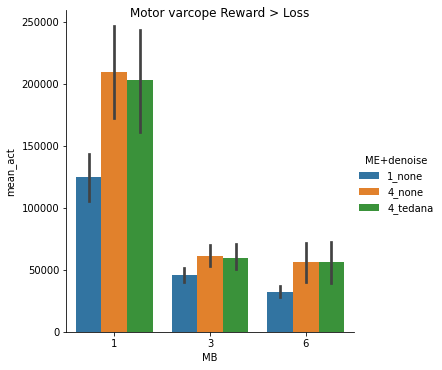

Motor cope


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM Dependent Variable: mean_act  
No. Observations:  171     Method:             REML      
No. Groups:        19      Scale:              22741.7689
Min. group size:   9       Log-Likelihood:     -1103.8303
Max. group size:   9       Converged:          Yes       
Mean group size:   9.0                                   
---------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   197.346   58.152  3.394 0.001  83.370 311.323
MB            2.820   13.162  0.214 0.830 -22.977  28.618
ME           16.218   15.540  1.044 0.297 -14.239  46.676
MB:ME        -1.407    3.969 -0.355 0.723  -9.185   6.371
Group Var 13781.316   38.162                             
=========================================================

"""

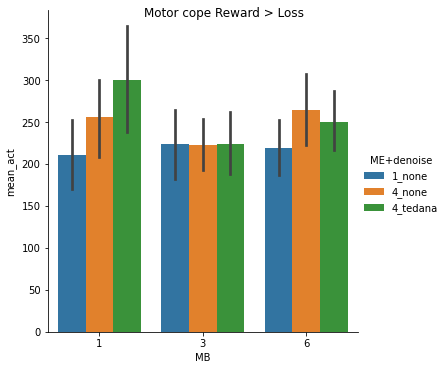

Motor zstat


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: mean_act 
No. Observations: 171     Method:             REML     
No. Groups:       19      Scale:              0.2872   
Min. group size:  9       Log-Likelihood:     -165.9884
Max. group size:  9       Converged:          Yes      
Mean group size:  9.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.585    0.221  2.647 0.008  0.152  1.017
MB            0.146    0.047  3.118 0.002  0.054  0.238
ME            0.017    0.055  0.313 0.754 -0.091  0.126
MB:ME        -0.007    0.014 -0.480 0.632 -0.034  0.021
Group Var     0.289    0.212                           
=======================================================

"""

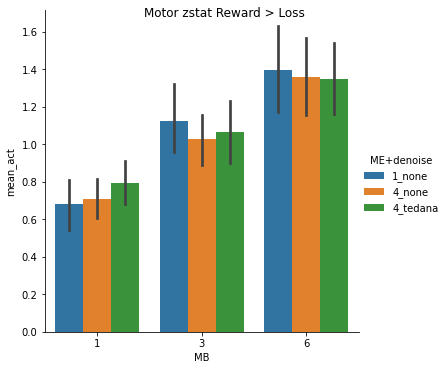

sCerb varcope


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                MixedLM   Dependent Variable:   mean_act        
No. Observations:     171       Method:               REML            
No. Groups:           19        Scale:                32282505034.2052
Min. group size:      9         Log-Likelihood:       -2286.9421      
Max. group size:      9         Converged:            Yes             
Mean group size:      9.0                                             
----------------------------------------------------------------------
               Coef.       Std.Err.   z    P>|z|   [0.025     0.975]  
----------------------------------------------------------------------
Intercept      292339.913 69546.856  4.203 0.000 156030.579 428649.246
MB             -43886.526 15681.816 -2.799 0.005 -74622.321 -13150.731
ME              34528.412 18514.769  1.865 0.062  -1759.869  70816.693
MB:ME           -3263.415  4728.245 -0.690 0.490 -12530.606   6003.776
Group Var 20254032241.397 46825.402                                   
======================================================================

"""

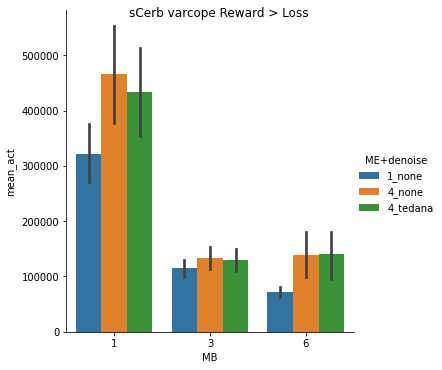

sCerb cope


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM Dependent Variable: mean_act  
No. Observations:  171     Method:             REML      
No. Groups:        19      Scale:              26859.3862
Min. group size:   9       Log-Likelihood:     -1121.8449
Max. group size:   9       Converged:          Yes       
Mean group size:   9.0                                   
---------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   222.577   67.693  3.288 0.001  89.901 355.253
MB           -1.303   14.304 -0.091 0.927 -29.338  26.733
ME           12.472   16.888  0.739 0.460 -20.628  45.572
MB:ME        -0.800    4.313 -0.186 0.853  -9.253   7.653
Group Var 27455.799   65.545                             
=========================================================

"""

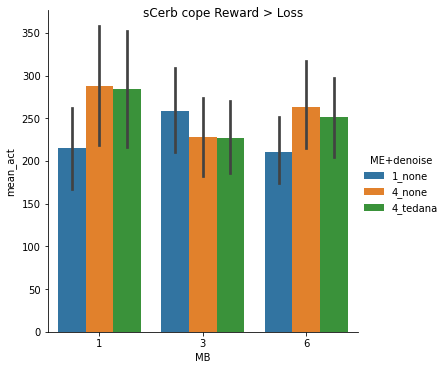

sCerb zstat


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: mean_act 
No. Observations: 171     Method:             REML     
No. Groups:       19      Scale:              0.1732   
Min. group size:  9       Log-Likelihood:     -123.5634
Max. group size:  9       Converged:          Yes      
Mean group size:  9.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.352    0.171  2.063 0.039  0.018  0.687
MB            0.119    0.036  3.287 0.001  0.048  0.191
ME            0.045    0.043  1.041 0.298 -0.039  0.129
MB:ME        -0.012    0.011 -1.110 0.267 -0.034  0.009
Group Var     0.170    0.161                           
=======================================================

"""

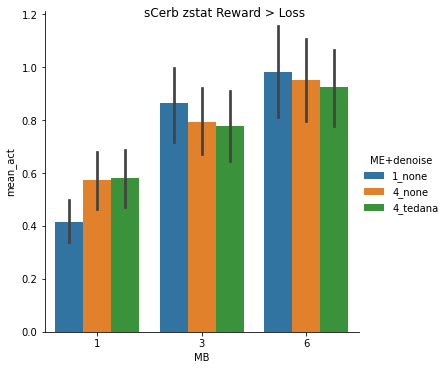

iCerb varcope


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM   Dependent Variable:   mean_act       
No. Observations:     171       Method:               REML           
No. Groups:           19        Scale:                9347871885.5530
Min. group size:      9         Log-Likelihood:       -2183.7780     
Max. group size:      9         Converged:            Yes            
Mean group size:      9.0                                            
---------------------------------------------------------------------
              Coef.       Std.Err.   z    P>|z|   [0.025     0.975]  
---------------------------------------------------------------------
Intercept     229789.035 37601.448  6.111 0.000 156091.551 303486.518
MB            -34032.692  8438.575 -4.033 0.000 -50571.996 -17493.389
ME              8185.289  9963.022  0.822 0.411 -11341.874  27712.453
MB:ME           -109.523  2544.326 -0.043 0.966  -5096.311   4877.265
Group Var 6117792709.658 26120.633                                   
=====================================================================

"""

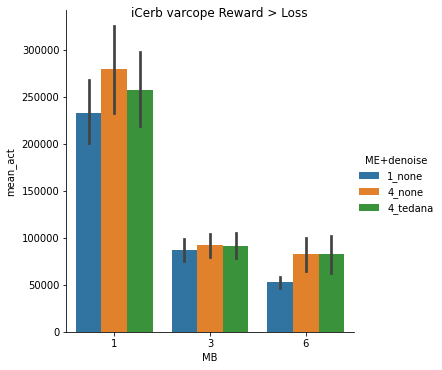

iCerb cope


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM Dependent Variable: mean_act  
No. Observations:  171     Method:             REML      
No. Groups:        19      Scale:              32582.9687
Min. group size:   9       Log-Likelihood:     -1131.7840
Max. group size:   9       Converged:          Yes       
Mean group size:   9.0                                   
---------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   134.596   67.766  1.986 0.047   1.777 267.415
MB           -0.037   15.755 -0.002 0.998 -30.915  30.842
ME           -0.461   18.601 -0.025 0.980 -36.918  35.996
MB:ME         2.131    4.750  0.449 0.654  -7.179  11.441
Group Var 14940.608   36.288                             
=========================================================

"""

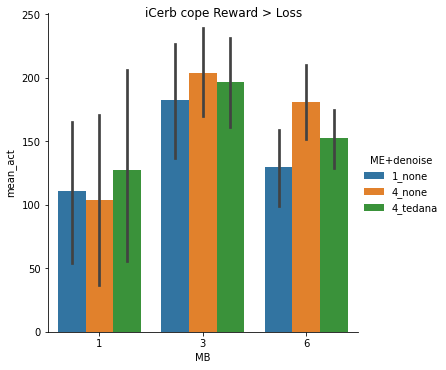

iCerb zstat


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: mean_act 
No. Observations: 171     Method:             REML     
No. Groups:       19      Scale:              0.2071   
Min. group size:  9       Log-Likelihood:     -131.9367
Max. group size:  9       Converged:          Yes      
Mean group size:  9.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.211    0.170  1.242 0.214 -0.122  0.543
MB            0.103    0.040  2.582 0.010  0.025  0.180
ME            0.027    0.047  0.567 0.570 -0.065  0.119
MB:ME        -0.007    0.012 -0.620 0.535 -0.031  0.016
Group Var     0.086    0.085                           
=======================================================

"""

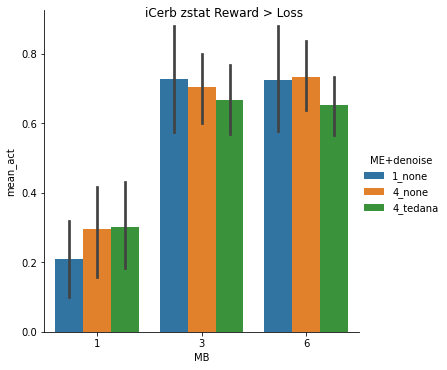

In [31]:

df=pd.read_csv("activation.tsv",sep="\t")
display(df.head())

df['acq']=df["MB"].astype(str) + df["ME"].astype(str)
df['ME+denoise']=df['ME'].astype(str)+'_'+df['denoise']
df['condition'] = df['contrast'].replace({5:'Computer Punishment',
                                          7:'Computer Reward',
                                          8:'Stranger Punishment',
                                          10:'Stranger Reward',
                                          11:'STR>Comp',
                                          12:'Left>Right',
                                         13: "Rew>Pun",
                                         14:"RP>N",
                                         15:"R>N",
                                         16:"N>P"})
good_subs=[10017,10024,10035,10043,10054,10059,10074,10078,
          10080,10108,10125,10136,
          10137,10142,10150,10154,
          10186,10188,10221]
df=df[df['sub'].isin(good_subs)]
for column in df.columns:
    print("%s values are: "%(column),df[column].unique())

for mask in ['Motor','sCerb','iCerb']:
    for stat in df['stat'].unique():
        print(mask,stat)
        plt_df=df[(df['mask_name']==mask)&(df['stat']==stat)&(df['contrast']==12)].copy()
        res=smf.mixedlm('mean_act ~ MB * ME',data=plt_df,groups=plt_df['sub']).fit()
        display(res.summary())
        #sns.barplot(x='MB',y='mean_act',hue='acq-scrub',hue_order=['1_none','4_none','4_tedana'],data=plt_df)
        g=sns.catplot(x='MB',y='mean_act',hue='ME+denoise',hue_order=['1_none','4_none','4_tedana'],
                      kind='bar',data=plt_df,ci=68)
        g.fig.suptitle('%s %s Reward > Loss'%(mask,stat))

        plt.show()

In [23]:
df

,sub,MB,ME,stat,contrast,denoise,mask_name,mean_act,median_act,acq,ME+denoise,condition


In [ ]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','stat','contrast','denoise','mask_name','mean_act','median_act'])
df.to_csv("activation.tsv",sep="\t",index=False)
display(df.head())

df['acq']=df["MB"].astype(str) + df["ME"].astype(str)
df['ME+denoise']=df['ME'].astype(str)+'_'+df['denoise']
df['condition'] = df['contrast'].replace({5:'Computer Punishment',
                                          7:'Computer Reward',
                                          8:'Stranger Punishment',
                                          10:'Stranger Reward',
                                          11:'STR>Comp',
                                          12:'Left>Right',
                                         13: "Rew>Pun",
                                         14:"RP>N",
                                         15:"R>N",
                                         16:"N>P"})
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
display(df.head())

df=df[df['sub'].isin(good_subs)]

for mask in ['Motor','sCerb','iCerb']:
    for stat in df['stat'].unique():
        print(mask,stat)
        plt_df=df[(df['mask_name']==mask)&(df['stat']==stat)&(df['contrast']==12)].copy()
        #sns.barplot(x='MB',y='mean_act',hue='acq-scrub',hue_order=['1_none','4_none','4_tedana'],data=plt_df)
        g=sns.catplot(x='MB',y='mean_act',hue='ME+denoise',hue_order=['1_none','4_none','4_tedana'],
                      kind='bar',data=plt_df,ci=68)
        g.fig.suptitle('%s %s %s'%(mask,stat,plt_df['condition'].to_list()[0]))

        plt.show()

In [ ]:
plt_df['condition'].to_list()[0]

In [ ]:
plt_df[[plt_df['mask_name']=='VS']]


# TSNR
- Heads up these Graphs are interactive

In [6]:
data=[]
img_list=[]
for img in f_list:
    start = time.time()

    me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
    mb=int(re.search('_acq-mb(.*?)me',img).group(1))
    sub=re.search('func/sub-(.*?)_task',img).group(1)
    print('sub: %s Multiband: %s Multiecho: %s'%(sub,mb,me))
    for mask in mask_list:
    mask = '../derivatives/fmriprep/sub-%s/func/sub-%s_task-sharedreward_acq-mb%sme%s_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'%(sub,sub,mb,me)
    
    nifti_masker = NiftiMasker(mask_img=mask)
    x=nifti_masker.fit_transform(img)
    img=nifti_masker.inverse_transform(x)
    end = time.time()
    #print("first maskfit:",end - start)
    #print(img.shape)
    
    
    # calculate mean image for the background
    from nilearn.image import math_img
    tsnr_img = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=img)
    tsnr_img.to_filename('../derivatives/tsnr/sub-%s_acq-mb%sme%s_tsnr.nii.gz' %(sub,mb,me))
#     img_list.append([tsnr_img,me,mb,sub])
#     y=str_mask.fit_transform(tsnr_img)
#     end = time.time()
#     print("STR maskfit:",end - start)
    
#     z=cort_mask.fit_transform(tsnr_img)
#     end = time.time()
#     print("CORT maskfit:",end - start)
#     data.append([sub,mb,me,np.mean(np.abs(y.flatten())),
#                  np.mean(np.abs(z.flatten()))])

#     end = time.time()
#     print(end - start)
    

sub: 10154 Multiband: 6 Multiecho: 4
sub: 10154 Multiband: 1 Multiecho: 4
sub: 10154 Multiband: 3 Multiecho: 4
sub: 10154 Multiband: 1 Multiecho: 1
sub: 10154 Multiband: 6 Multiecho: 1
sub: 10154 Multiband: 3 Multiecho: 1


KeyboardInterrupt: 

In [ ]:

df=pd.DataFrame(data=data,columns=['sub','MB','ME','Striatum','MPFC'])
df.to_csv("TSNRinfo.tsv",sep="\t",index=False)
df=df.melt(id_vars=['sub','MB','ME'],var_name='Region',value_name='TSNR')
display(df.head())
plt_df=df[df['Region']=='Striatum']

sns.barplot(x='MB',y='TSNR',hue='ME',data=plt_df)

In [ ]:
img_list


def collect_tsnr(img):
    start = time.time()

    me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
    mb=int(re.search('_acq-mb(.*?)me',img).group(1))
    sub=re.search('func/sub-(.*?)_task',img).group(1)
    print(sub,mb,me)
    #mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)
    
    nifti_masker = NiftiMasker(mask_strategy='background')
    x=nifti_masker.fit_transform(img)
    img=nifti_masker.inverse_transform(x)
    end = time.time()
    print("first maskfit:",end - start)
    print(img.shape)
    
    
    # calculate mean image for the background
    from nilearn.image import math_img
    tsnr_img = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=img)
    img_list=[tsnr_img,me,mb,sub]
    y=str_mask.fit_transform(tsnr_img)
    print("STR maskfit:",end - start)
    z=cort_mask.fit_transform(tsnr_img)
    print("CORT maskfit:",end - start)
    data_row=[sub,mb,me,np.mean(np.abs(x.flatten())),
                 np.mean(np.abs(y.flatten())),
                 np.mean(np.abs(z.flatten()))]
    return([img_list,data_row])

    end = time.time()
    print(end - start)

def driver_func(myfunc,input_list):
    THREADS=10
    with multiprocessing.Pool(THREADS) as pool:
        results=pool.map(myfunc,input_list)
    return(results)
data=driver_func(collect_tsnr,f_list)

for img in img_list:
    plotting.plot_stat_map(img[0],
                      title="tsnr for Sub: %s ME: %s MB: %s "%(img[3],img[1],img[2]),
                      vmax=200,draw_cross=False)
    plt.show()


## Plot tsnr Maps

In [ ]:
img=f_list[0]

#nifti_masker = NiftiMasker(mask_strategy='epi')
#x=nifti_masker.fit_transform(img)
#img=nifti_masker.inverse_transform(x)
tsnr_img = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=img)
plotting.plot_stat_map(tsnr_img)

In [ ]:
sub='10017'
sub_list=[img for img in img_list if img[3]==sub]
display(sub_list)
for img in sub_list:
    plotting.plot_stat_map(img[0],title="tsnr for Sub: %s ME: %s MB: %s "%(img[3],img[1],img[2]),vmax=200,draw_cross=False)
    plt.show()

# L1 Z-stats


In [ ]:
f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
    '../derivatives/fsl/') for f in files if ('zstat' in f) & f.endswith('.nii.gz') ]#  ('stats' in root) &if ('/stats/zstat' in f) & (f.endswith('nii.gz'))]
f_list=[f for f in f_list if ('stats/zstat' in f) & ('L1_task' in f) &('denoise-' in f)&('type-act' in f)]
display(f_list)

In [ ]:

def collect_zstats(img):
    zstat=int(re.search('thresh_zstat(.*).nii.gz',img).group(1))
    if zstat>10:
        me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
        mb=int(re.search('_acq-mb(.*?)me',img).group(1))
        sub=re.search('fsl/sub-(.*?)/L1',img).group(1)
        mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)
        if mb>1:
            denoise=re.search('_denoise-9(.*).feat',img).group(1)
        else:
            denoise='none'

        nifti_masker = NiftiMasker(mask_strategy='background')
        x=nifti_masker.fit_transform(img)
        img=nifti_masker.inverse_transform(x)

        # calculate mean image for the background
    
        x=nifti_masker.fit_transform(img)
        y=str_mask.fit_transform(img)
        z=cort_mask.fit_transform(img)
        
        img_row=[str_mask.inverse_transform(y),img,zstat,me,mb,sub]

        data_row=[sub,mb,me,denoise,zstat,np.mean(np.abs(x.flatten())),
                     np.mean(np.abs(y.flatten())),
                     np.mean(np.abs(z.flatten()))]
        return(data_row)

def driver_func(myfunc,input_list):
    THREADS=4
    with multiprocessing.Pool(THREADS) as pool:
        data_res=[pool.apply_async(myfunc,p) for p in input_list]
        
res=driver_func(collect_zstats,f_list)
print(res)

In [ ]:
data=[]
img_list=[]
                                        
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
for img in f_list:    
    zstat=int(re.search('zstat(.*).nii.gz',img).group(1))
    if zstat in[5,6,7,8,9,10,13,14,15,16]:
        me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
        mb=int(re.search('_acq-mb(.*?)me',img).group(1))
        sub=re.search('fsl/sub-(.*?)/L1',img).group(1)
        mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)
        if me>1:
            if '_denoise-' in img:
                denoise=re.search('_denoise-(.*).feat',img).group(1)
            else:
                continue
        else:
            denoise='none'
        if sub in good_subs:

            #mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)

            #nifti_masker = NiftiMasker(mask_strategy='background')
            x=cort_mask.fit_transform(img)

            # calculate mean image for the background

            #x=nifti_masker.fit_transform(img)
            #y=str_mask.fit_transform(img)
            z=str_mask.fit_transform(img)

            #img_list.append([str_mask.inverse_transform(y),img,zstat,me,mb,sub])

            data.append([sub,mb,me,zstat,denoise,np.mean(z.flatten()),np.mean(x.flatten())])

In [ ]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','contrast','denoise','Striatum','PFC'])
df=df.melt(id_vars=['contrast','sub','MB','ME','denoise'],var_name='Region',value_name='zstat')
df['acq']=df["MB"].astype(str) + df["ME"].astype(str)
df['acq-scrub']=df['ME'].astype(str)+df['denoise']
df['condition'] = df['contrast'].replace({5:'Computer Punishment',
                                          7:'Computer Reward',
                                          8:'Stranger Punishment',
                                          10:'Stranger Reward',
                                         13: "Rew>Pun",
                                         14:"RP>N",
                                         15:"R>N",
                                         16:"N>P"})
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
display(df.head())
df=df[df['condition'].isin(['Rew>Pun'])]
df=df[df['sub'].isin(good_subs)]
df=df[df['Region']=='Striatum']
display(df.head())
#df[['Player','Reward']] = df.condition.str.split(expand=True)
#plt_df=df[df['Region']=='Striatum']
#plt_df=plt_df[plt_df['Player']=='Stranger']

#plt_df=plt_df.groupby(by=['sub','acq']).mean().reset_index()

#display(plt_df.head())
df['ME+denoise']=df['ME'].astype(str)+'_'+df['denoise']
g=sns.catplot(x='MB',y='zstat',hue='ME+denoise',kind='bar',data=df,ci=95)
g.savefig('Rew-zstat.pdf')
#plt_df=plt_df[plt_df['Reward']=='Reward']
#g=sns.catplot(x='acq',y='zstat',hue='Player',kind='bar',data=plt_df,ci=85,
#              dodge=True,order=['11','14','31','34','61','64'])
#g.savefig('str-zstat.pdf')
#plt_df.head(13)

# Plotting Results from Whole Brain Anova

## Making masks

In [ ]:
from natsort import natsorted
sigfiles=[['_ppi','cope13.feat','zstat2']]

mask_file='../derivatives/fsl/L3_ANOVA_n19%s.gfeat/%s/cluster_mask_%s.nii.gz'%(
    sigfiles[0][0],sigfiles[0][1],sigfiles[0][2])
print(mask_file)

sig_mask=NiftiMasker(mask_img=mask_file)
plotting.plot_roi(sig_mask.mask_img,title="Cluster Mask", draw_cross=False)
plt.show()


In [ ]:
f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
    '../derivatives/fsl/') for f in files if ('zstat' in f) & f.endswith('.nii.gz') ]
f_list=[f for f in f_list if ('stats/zstat' in f) & ('L1_task' in f) &('denoise-none' in f)&('type-ppi' in f)]
#display(f_list)

In [ ]:
data=[]
img_list=[]
                                        
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
for img in f_list:    
    zstat=int(re.search('zstat(.*).nii.gz',img).group(1))
    if zstat in[13]:
        me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
        mb=int(re.search('_acq-mb(.*?)me',img).group(1))
        sub=re.search('fsl/sub-(.*?)/L1',img).group(1)
        mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)
        if me>1:
            if '_denoise-' in img:
                denoise=re.search('_denoise-(.*).feat',img).group(1)
            else:
                continue
        else:
            denoise='none'
        if sub in good_subs:

            x=sig_mask.fit_transform(img)
            
            data.append([sub,mb,me,zstat,denoise,np.mean(x.flatten())])

In [ ]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','contrast','denoise','VS-Cerb Connectivity'])
df['ME+denoise']=df['ME'].astype(str)+'_'+df['denoise']
g=sns.catplot(x='MB',y='VS-Cerb Connectivity',hue='ME',kind='bar',data=df,ci=95)
g.savefig('PPI_seed-VS_target-Cerb_contrast-Rew-Pun_cluster2.pdf')